In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

2.Plot bar charts showing impact of employee salaries on retention

3.Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model


In [ ]:
df = pd.read_csv('HR_comma_sep.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.loc[df.salary == 'low', 'salary'] = 0
df.loc[df.salary == 'medium', 'salary'] = 1
df.loc[df.salary == 'high', 'salary'] = 2

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0


In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,4,0
14995,0.37,0.48,2,160,3,0,1,0,4,0
14996,0.37,0.53,2,143,3,0,1,0,4,0
14997,0.11,0.96,6,280,4,0,1,0,4,0


<Axes: >

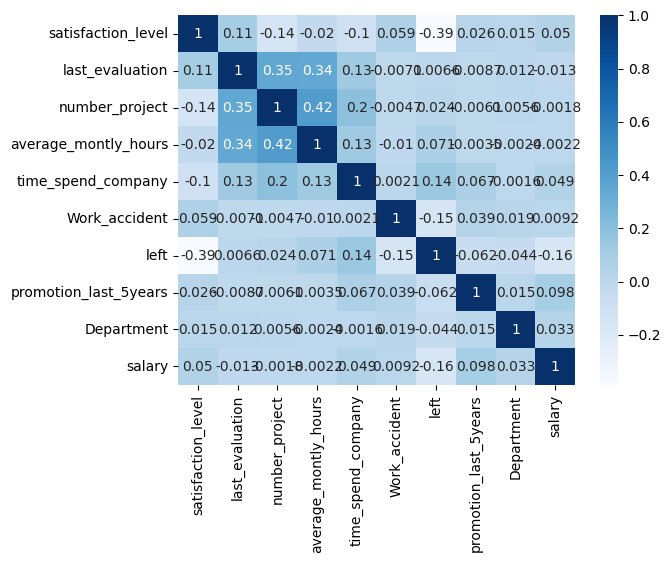

In [ ]:
df.corr()
sns.heatmap(df.corr(), cbar=True, )

Employees who left:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000



Employees who were retained:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


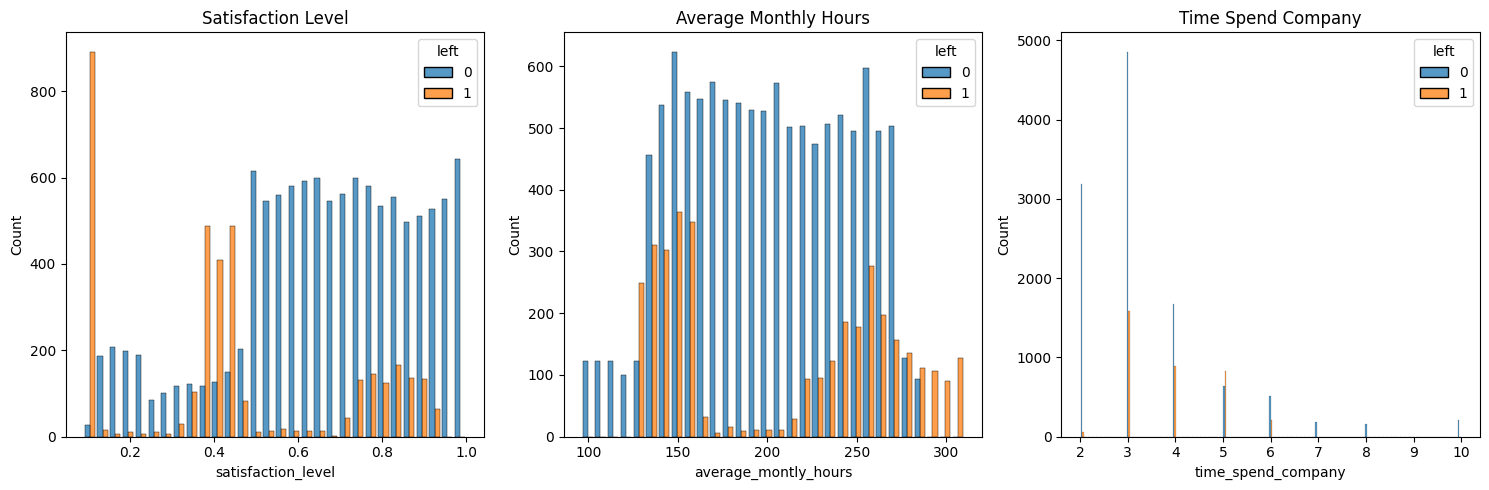

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

# Satisfaction Level
sns.histplot(data=df, x='satisfaction_level', hue='left', multiple='dodge', shrink=.8, ax=axes[0])
axes[0].set_title('Satisfaction Level')

# Average Monthly Hours
sns.histplot(data=df, x='average_montly_hours', hue='left', multiple='dodge', shrink=.8, ax=axes[1])
axes[1].set_title('Average Monthly Hours')

# Time Spend Company
sns.histplot(data=df, x='time_spend_company', hue='left', multiple='dodge', shrink=.8, ax=axes[2])
axes[2].set_title('Time Spend Company')

plt.tight_layout()
plt.show()

<Axes: xlabel='salary', ylabel='left'>

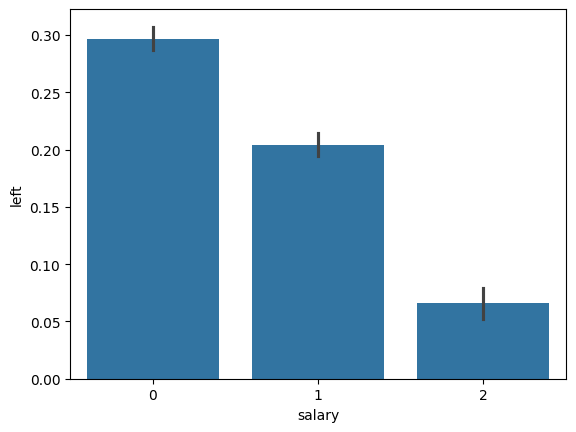

In [ ]:
sns.barplot(x='salary', y='left', data=df)

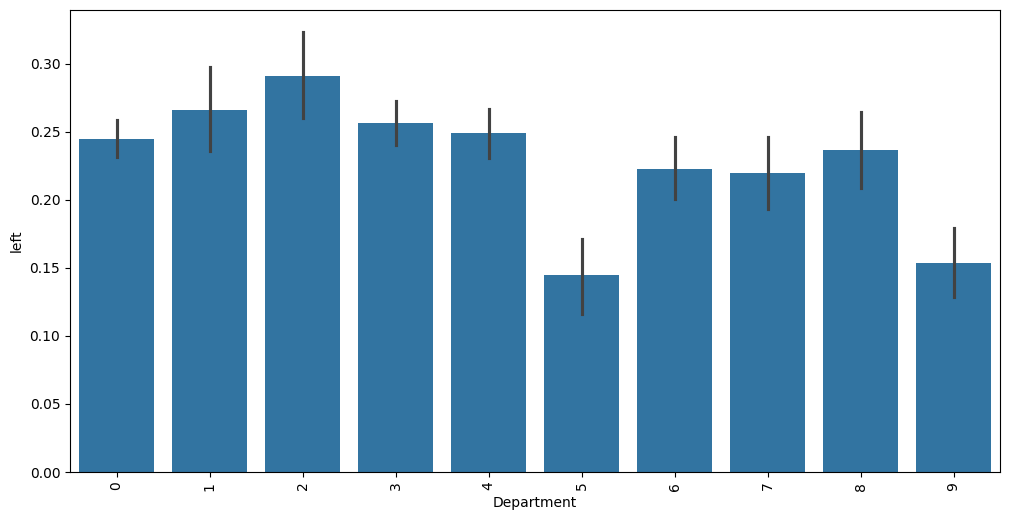

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='left', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
df.discribe()

AttributeError: 'DataFrame' object has no attribute 'discribe'

In [ ]:

# The 'left' column is the target variable (y) because it represents the outcome we want to predict
# (whether an employee leaves or not). The other columns are the features (X) that we will use
# to make the prediction.

X = df.drop('left', axis = 1)
Y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_reg.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
log_reg.predict_proba(X_test)

array([[0.91502439, 0.08497561],
       [0.43709782, 0.56290218],
       [0.70625511, 0.29374489],
       ...,
       [0.88674632, 0.11325368],
       [0.56930327, 0.43069673],
       [0.69242489, 0.30757511]])

In [ ]:
log_reg.score(X_test, y_test)

0.804

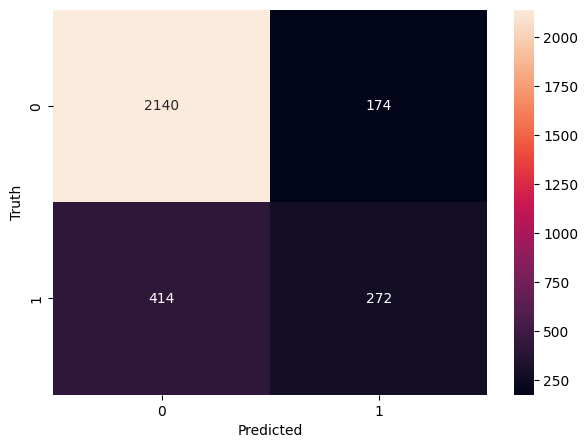

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

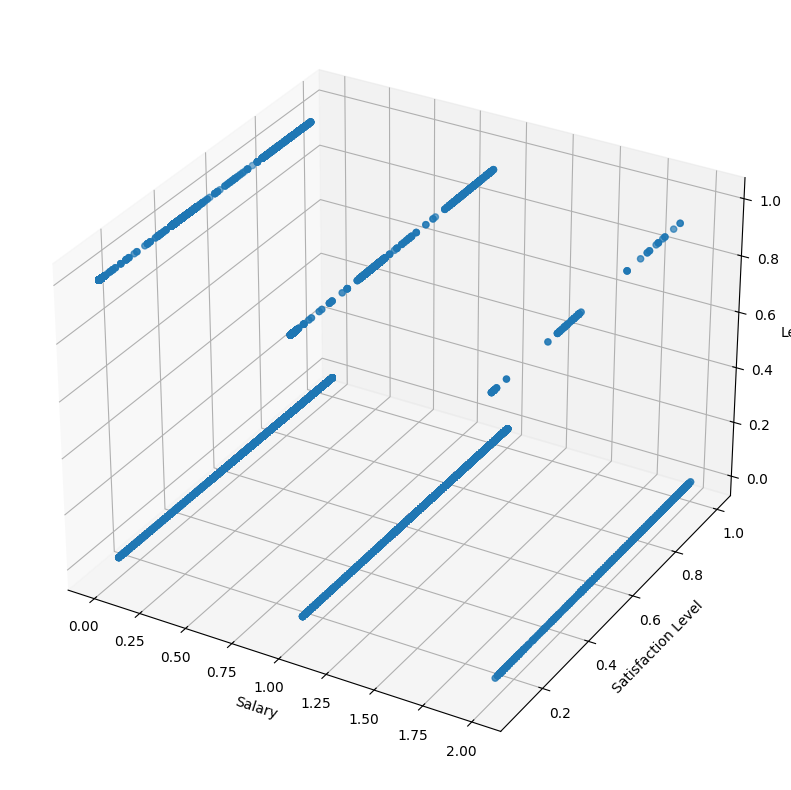

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['salary'], df['satisfaction_level'], df['left'])

ax.set_xlabel('Salary')
ax.set_ylabel('Satisfaction Level')
ax.set_zlabel('Left')

plt.show()

In [ ]:
from sklearn.svm import SVC

NameError: name 'X_train' is not defined